#### IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from glob import glob

#### IMPORTAÇÃO DOS DADOS

In [2]:
HCS_1_in = pd.read_csv("force-save-2024.10.18-16.08.11.263.txt", sep = '\s+', engine='python', header=77, skipfooter=4077)
HCS_1_out = pd.read_csv("force-save-2024.10.18-16.08.11.263.txt", sep = '\s+', engine='python', header=4176, skipfooter=0)

#### REPRESENTAÇÃO GRÁFICA

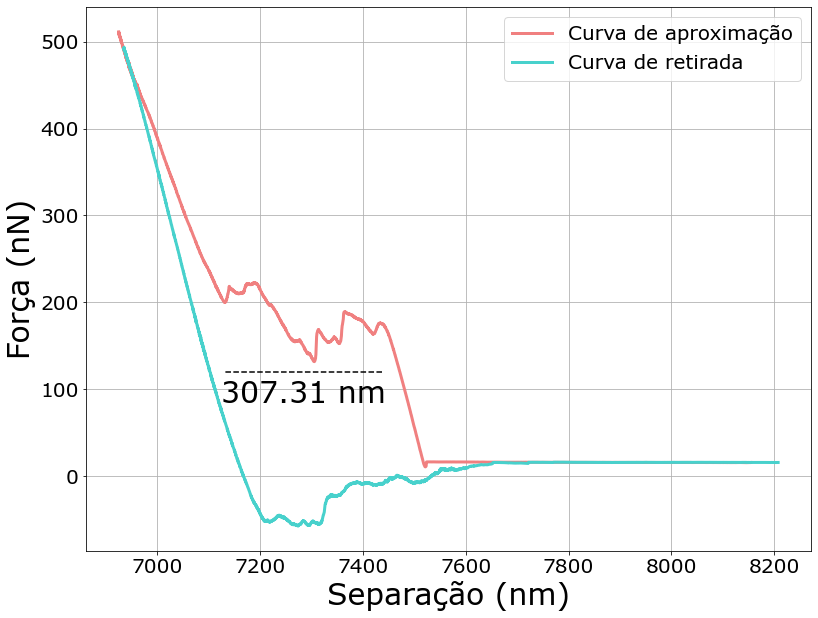

In [3]:
plt.rcParams['font.family'] = 'Verdana'
plt.figure(figsize=(13, 10))
plt.plot(HCS_1_in.iloc[:, 2] * 1e9, HCS_1_in.iloc[:, 1] * 1e9, label='Curva de aproximação', linewidth=3, linestyle='-', color='lightcoral')
plt.plot(HCS_1_out.iloc[:, 2] * 1e9, HCS_1_out.iloc[:, 1] * 1e9, label='Curva de retirada', linewidth=3, linestyle='-', color='mediumturquoise')

# Encontrar mínimos locais na curva de aproximação
valleys, _ = find_peaks(-HCS_1_in.iloc[:, 1] * 1e9)  # Inverter os valores para encontrar mínimos

# Filtrar mínimos locais
filtered_valleys = [v for v in valleys if 175 < (HCS_1_in.iloc[v, 1] * 1e9) < 201]

if len(filtered_valleys) > 0:
    first_valley_index = filtered_valleys[0]
    last_valley_index = filtered_valleys[-1]

    # Obter as coordenadas x e y dos vales
    first_valley_x = HCS_1_in.iloc[first_valley_index, 2] * 1e9
    last_valley_x = HCS_1_in.iloc[last_valley_index, 2] * 1e9
    first_valley_y = HCS_1_in.iloc[first_valley_index, 1] * 1e9
    last_valley_y = HCS_1_in.iloc[last_valley_index, 1] * 1e9

    # Traçar a linha horizontal entre os mínimos
    y_value = 150  # Valor no eixo y onde a linha será desenhada
    plt.hlines(y=y_value-30, xmin=first_valley_x, xmax=last_valley_x, colors='black', linestyles='dashed')

    # Calcular a diferença entre os valores dos mínimos
    difference = first_valley_x - last_valley_x

    # Anotação da diferença
    plt.annotate(f'{difference:.2f} nm', xy=((first_valley_x + last_valley_x) / 2, y_value - 65),
                 fontsize=30, color='black', ha='center')

plt.xlabel('Separação (nm)', size=30)
plt.ylabel('Força (nN)', size=30)
plt.tick_params(labelsize=20)
plt.rcParams['legend.fontsize'] = 20
plt.grid()
plt.legend(loc='upper right')
plt.savefig('force-distance_curve.png', dpi=300)
plt.show()


#### VISUALIZAÇÃO DE TODOS OS DADOS NA PASTA

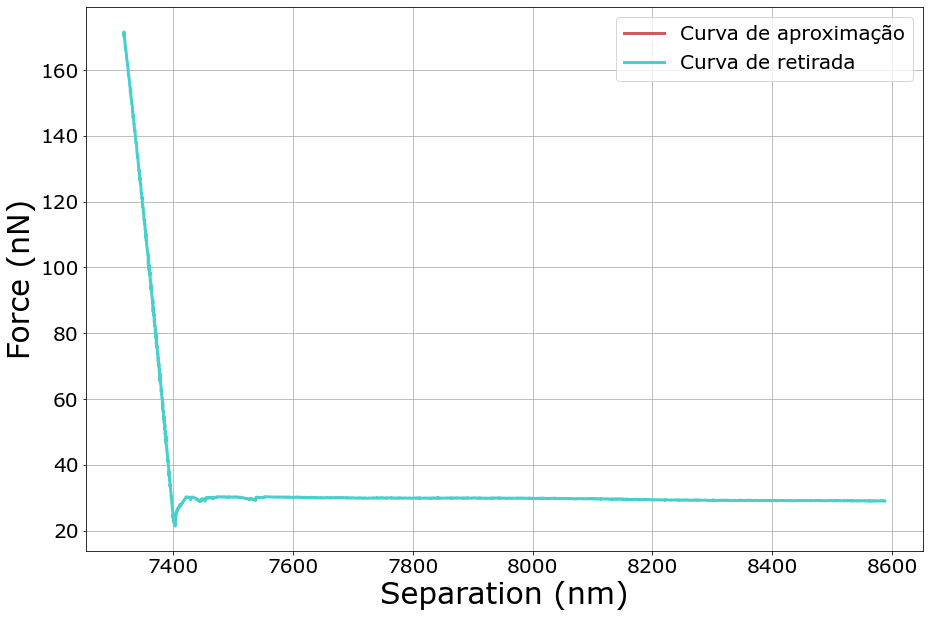

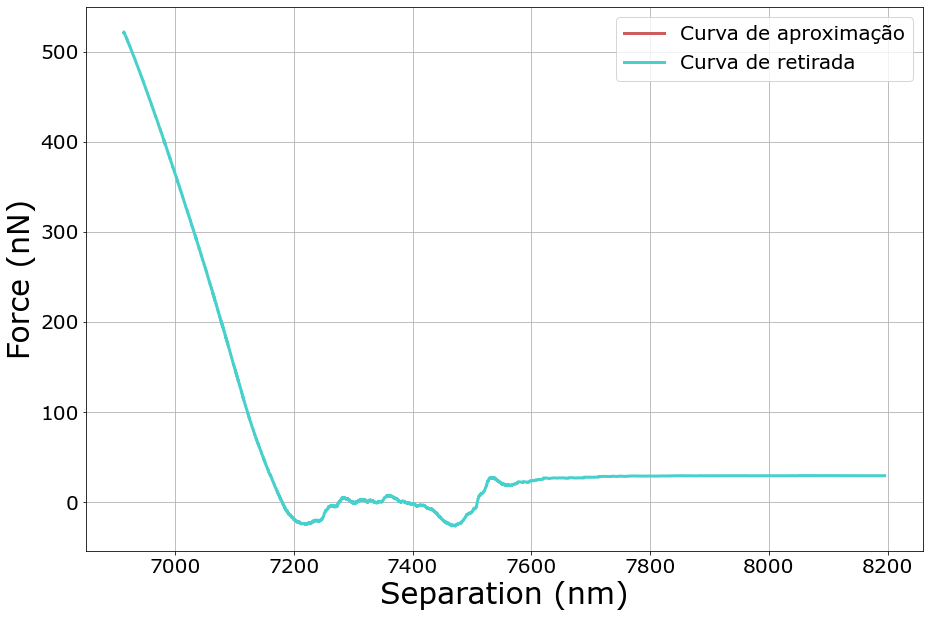

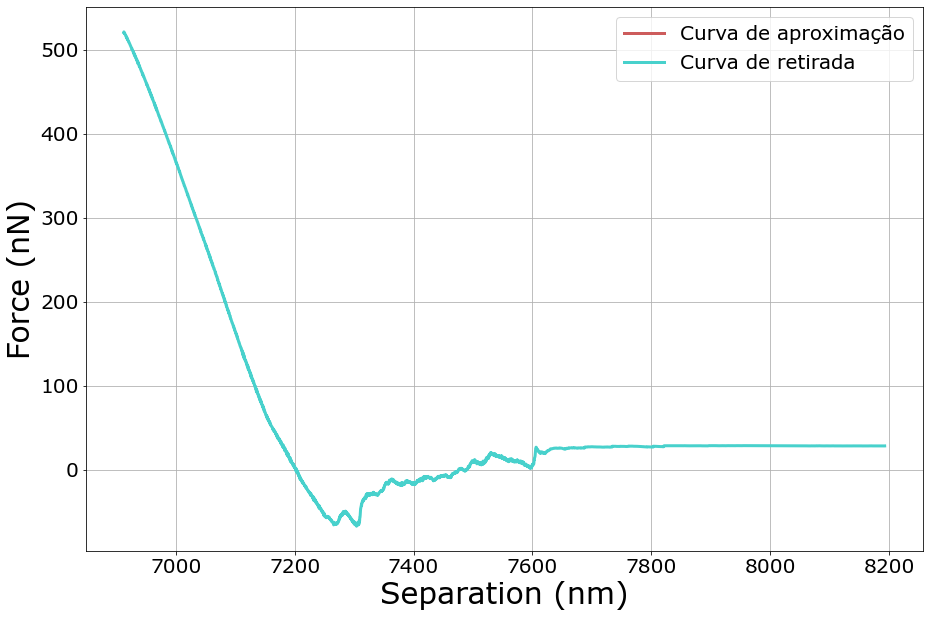

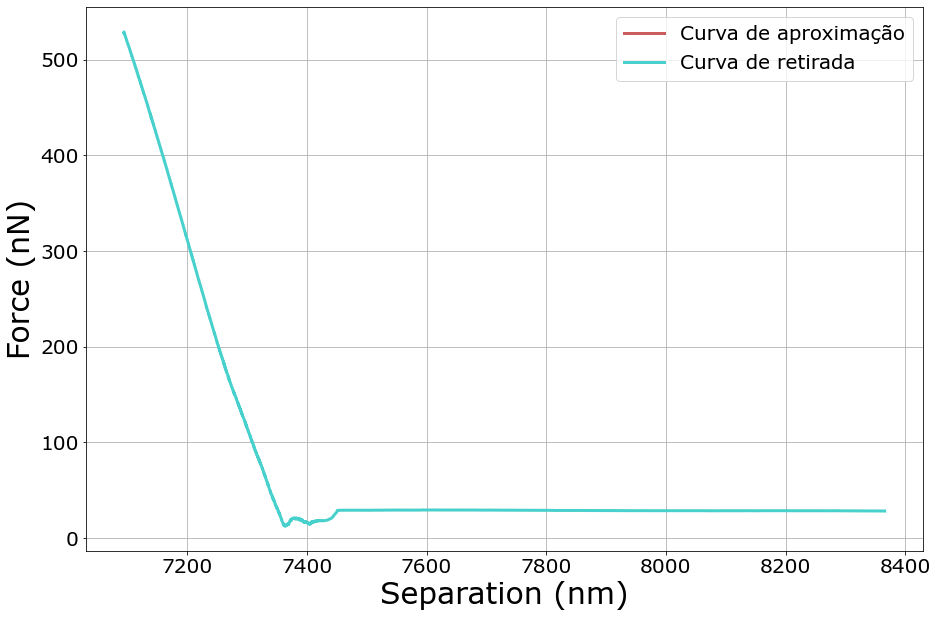

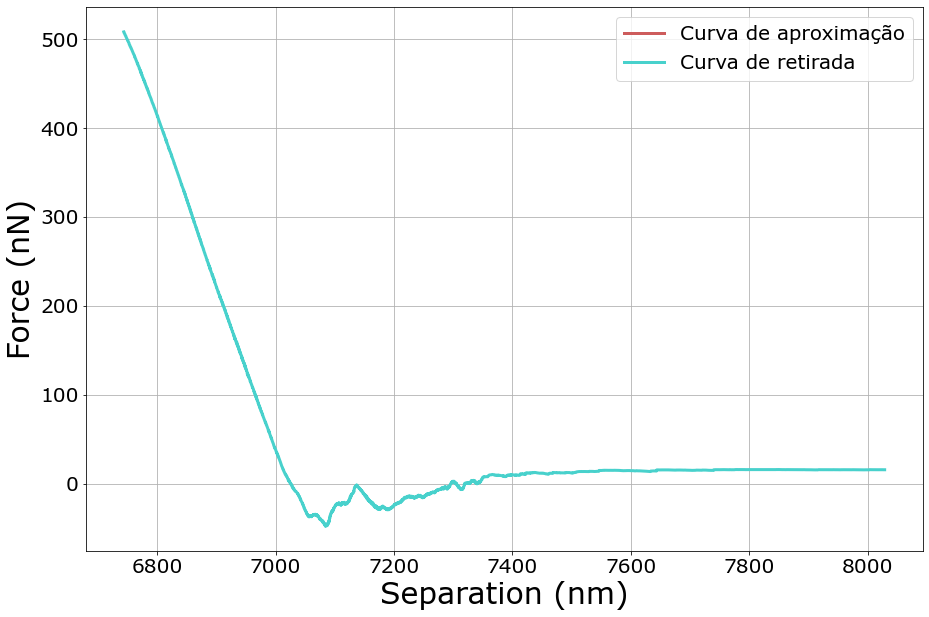

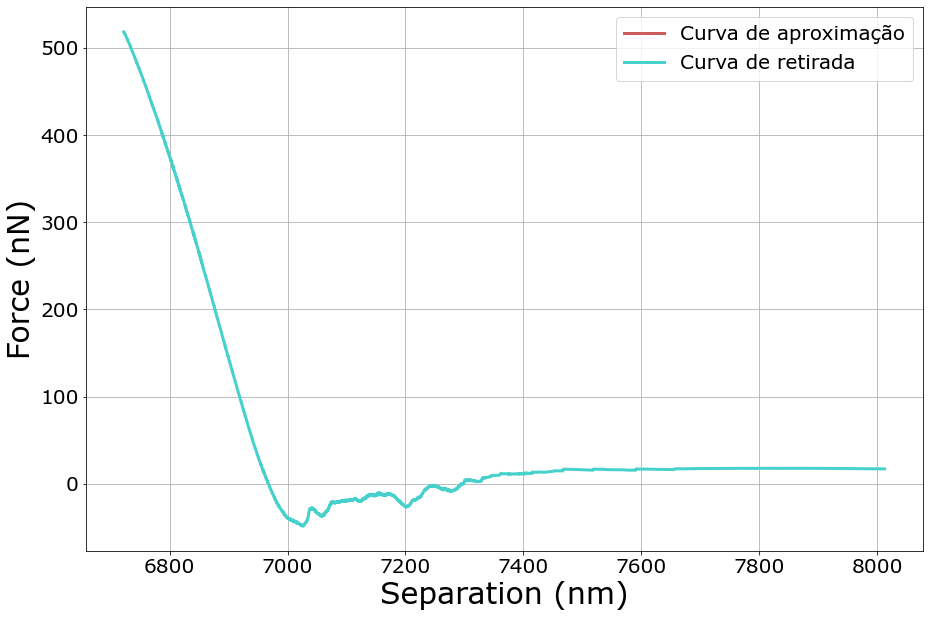

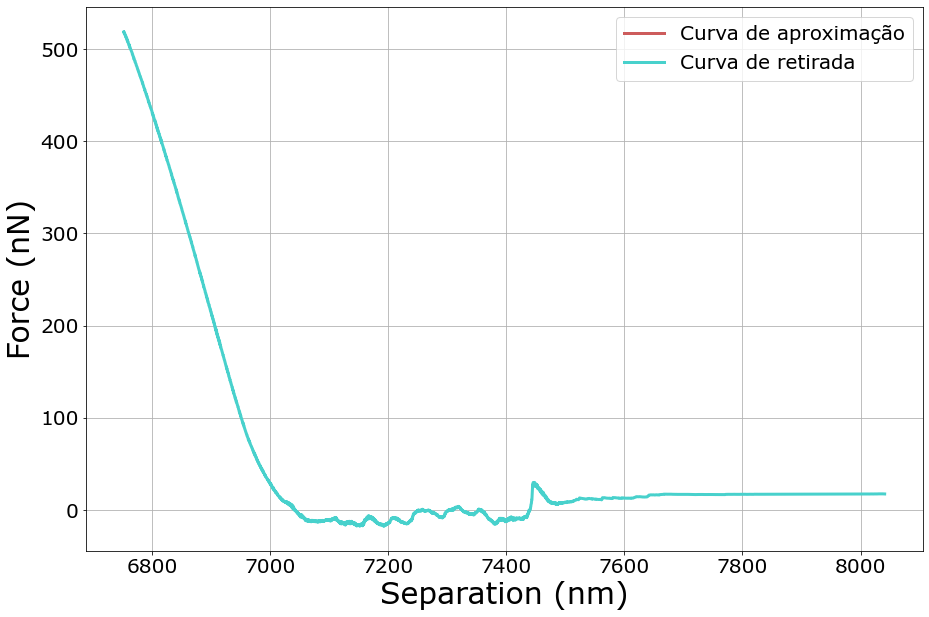

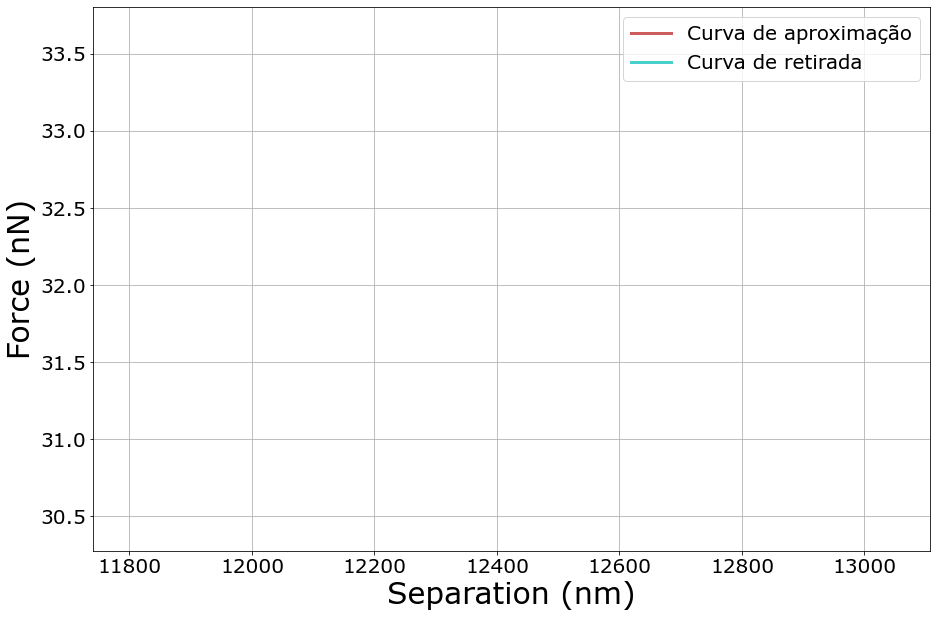

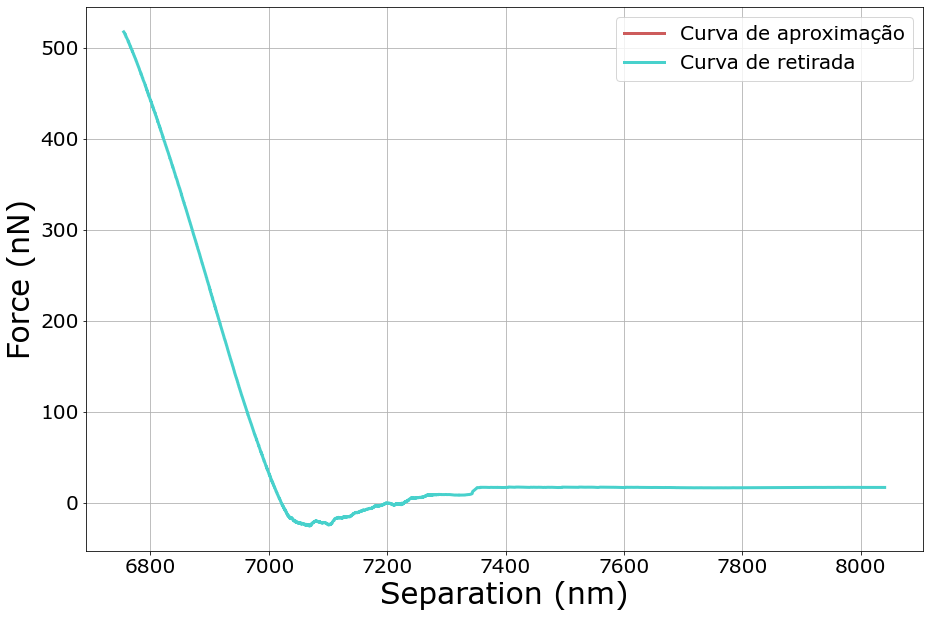

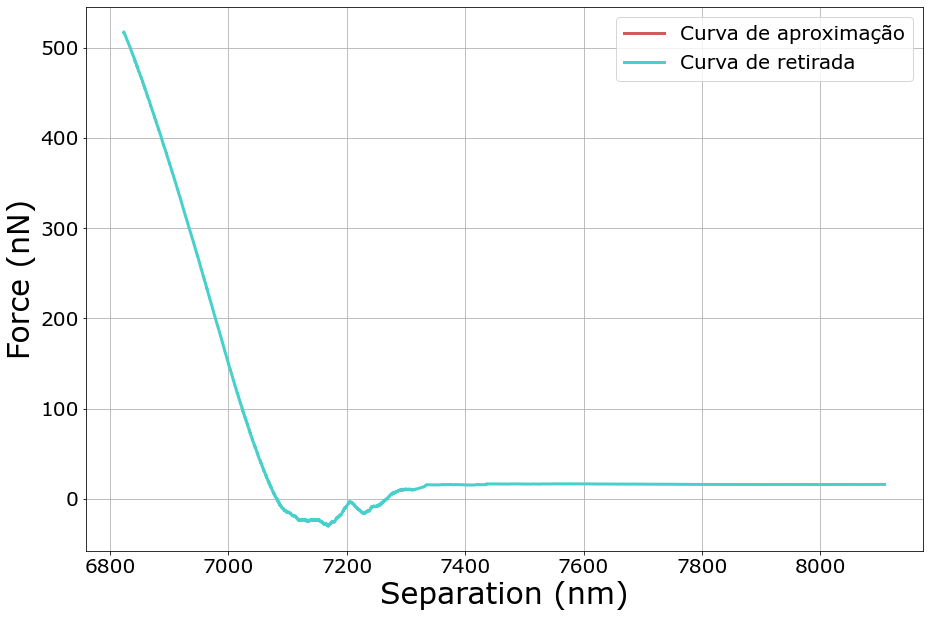

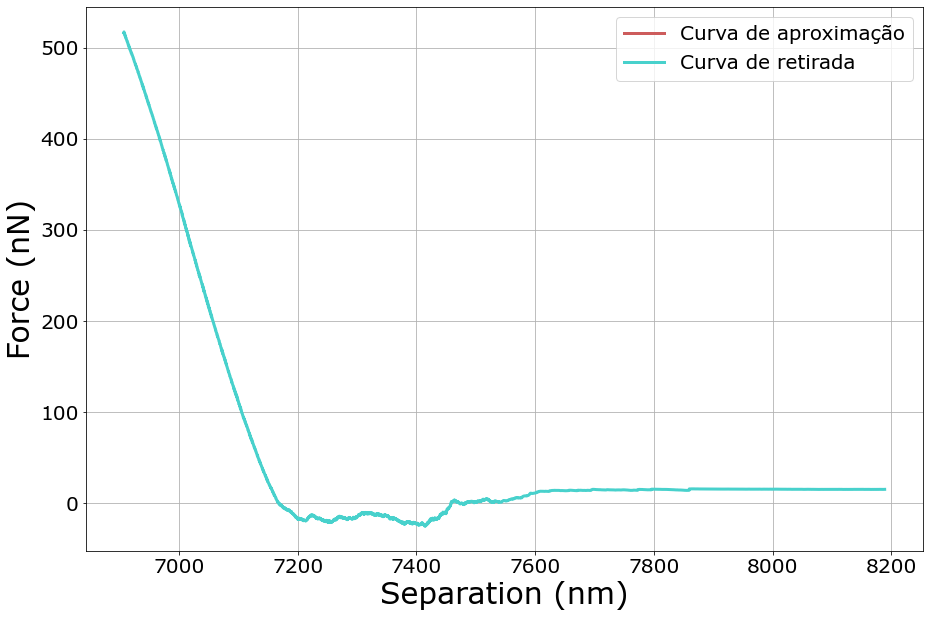

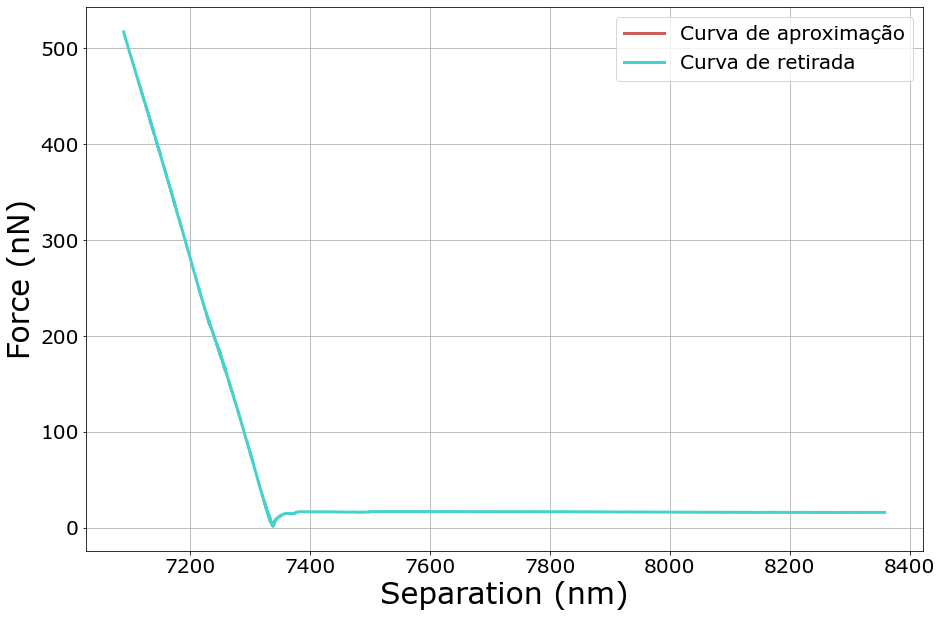

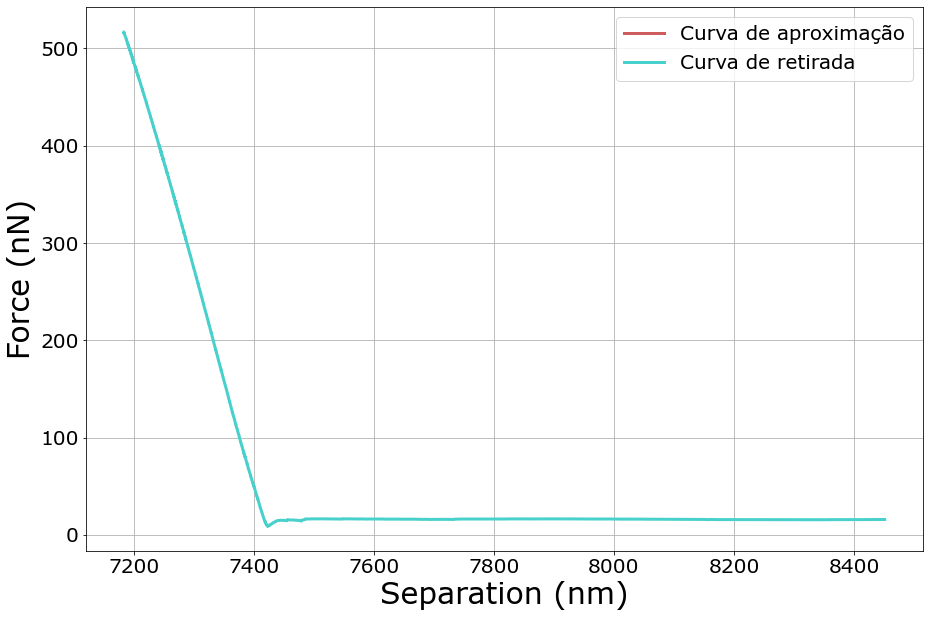

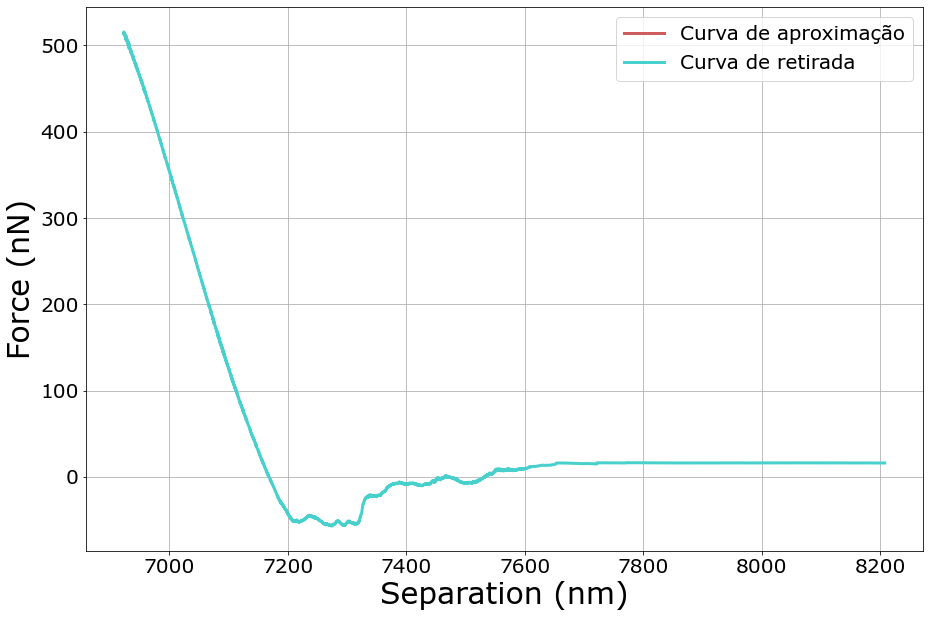

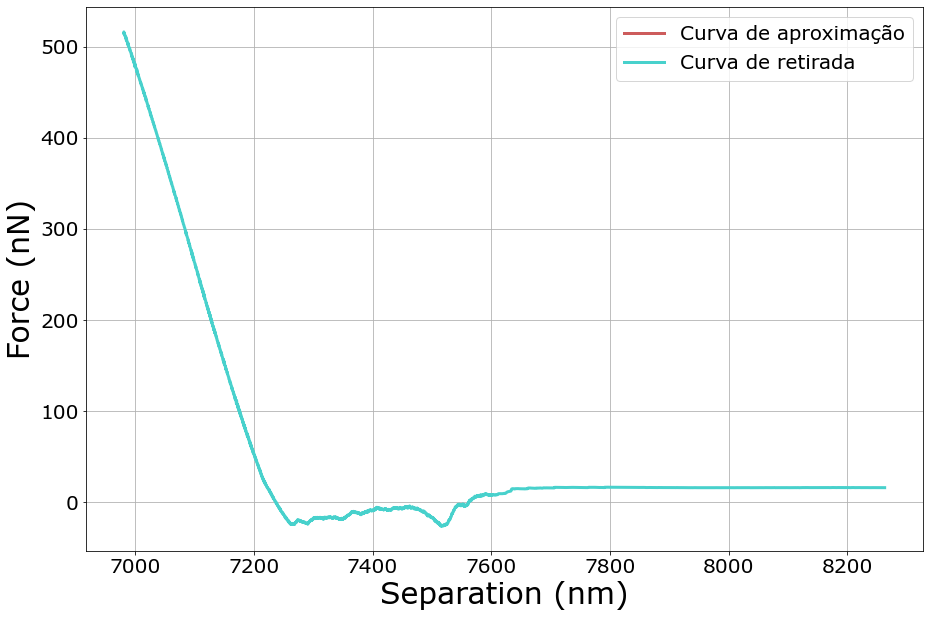

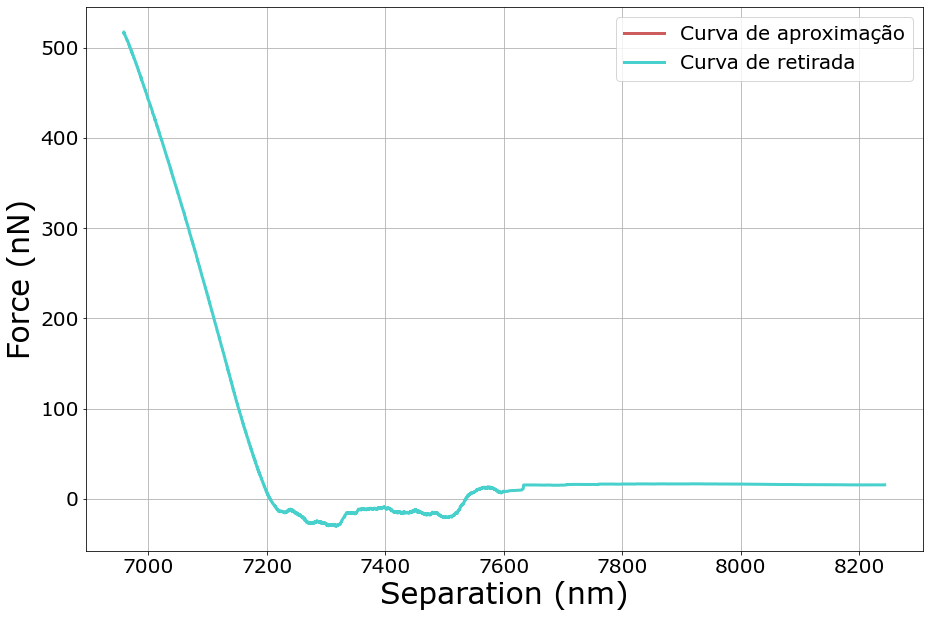

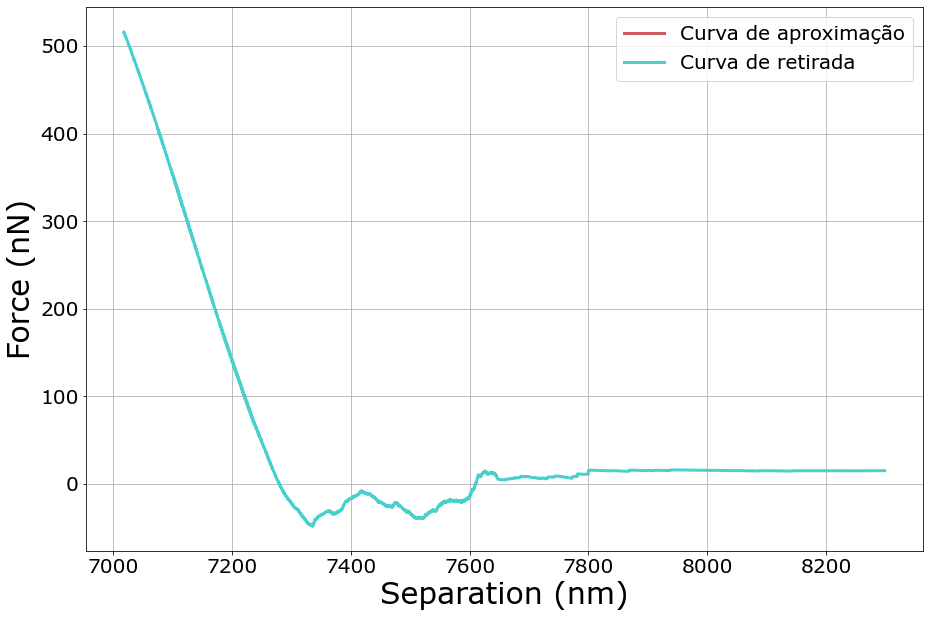

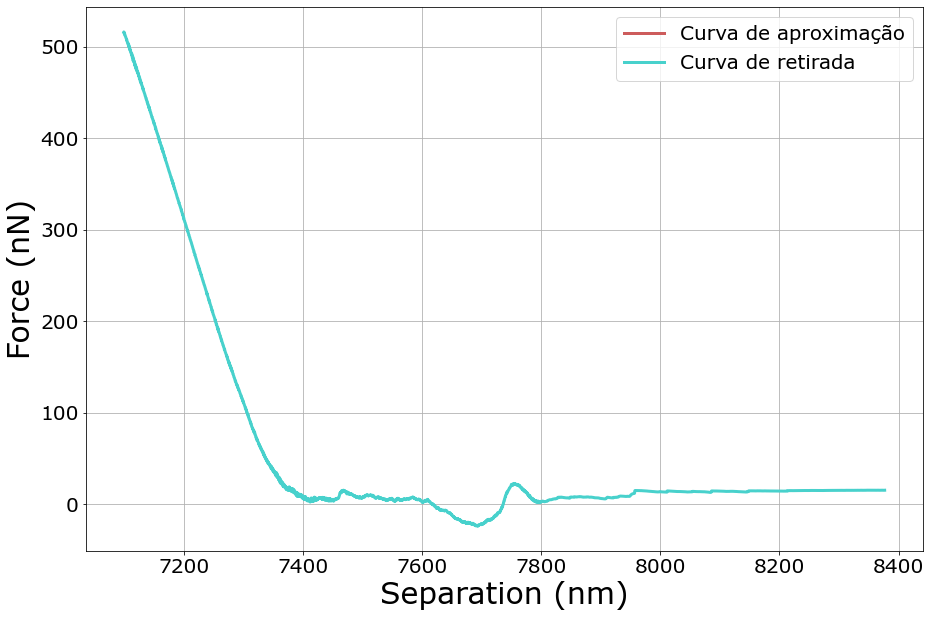

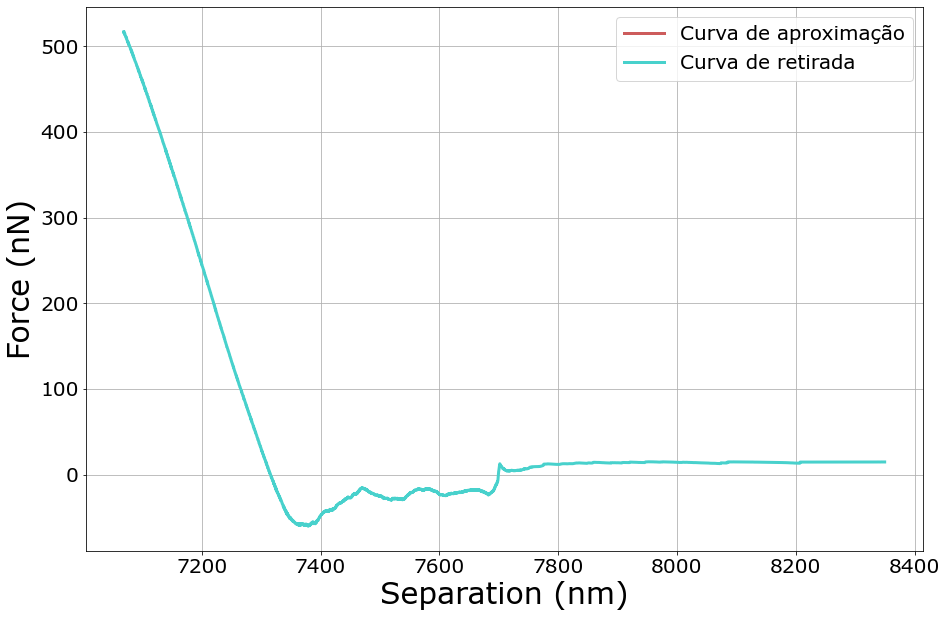

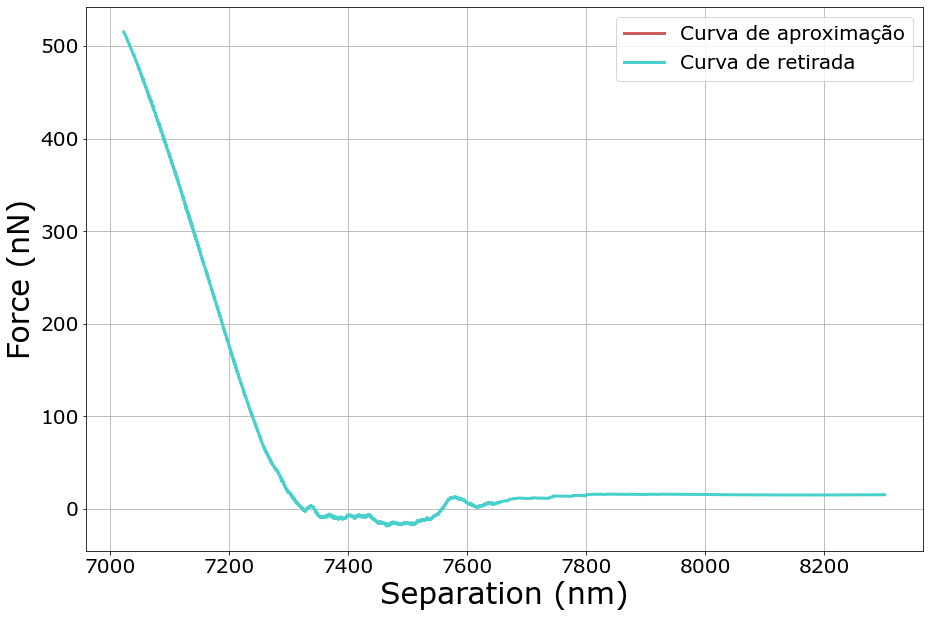

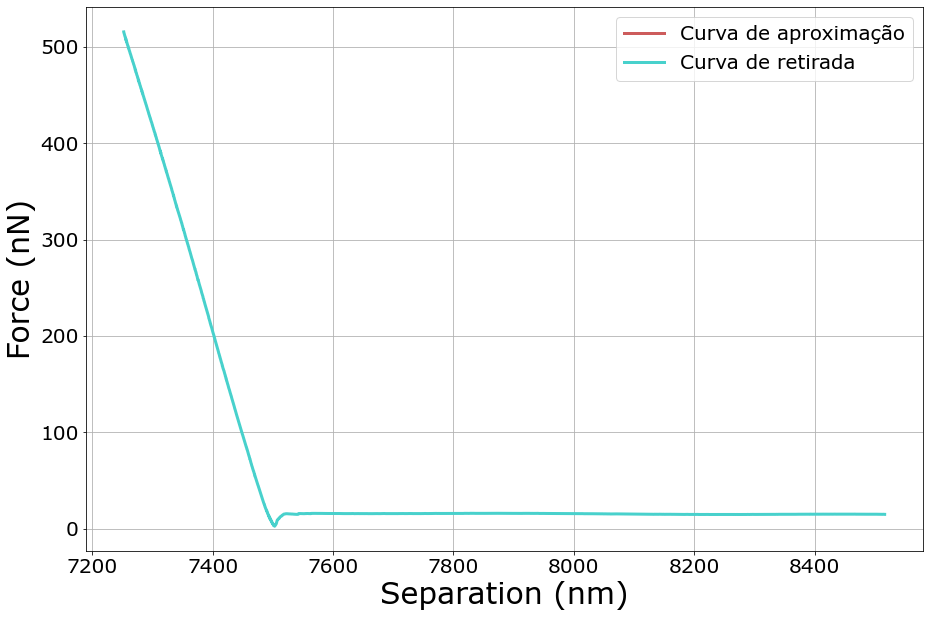

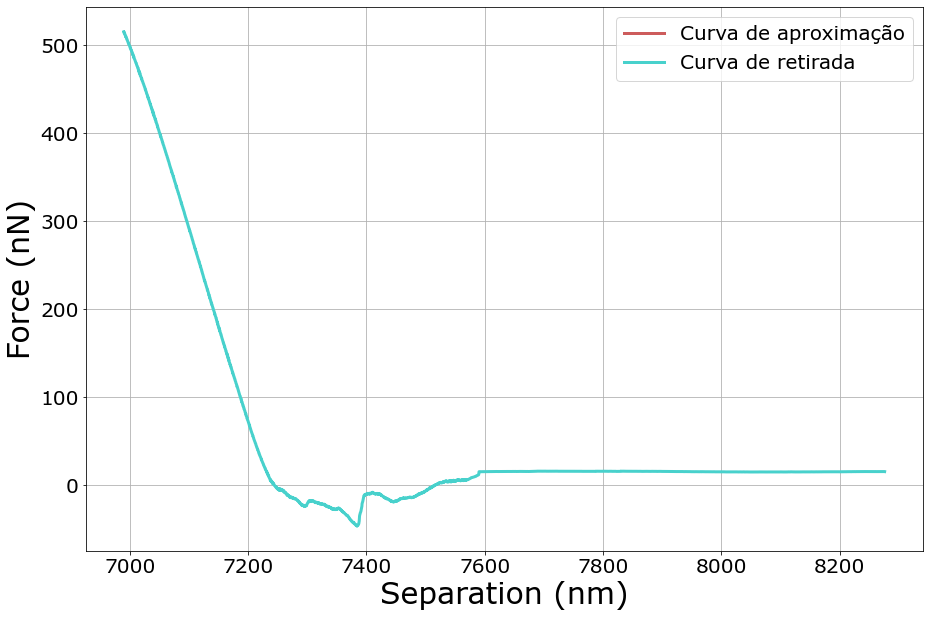

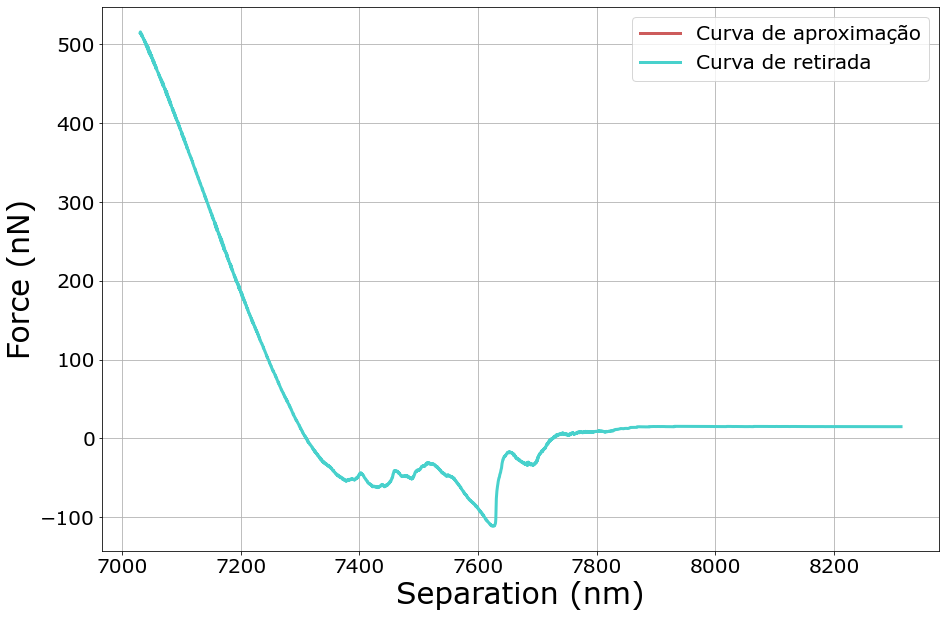

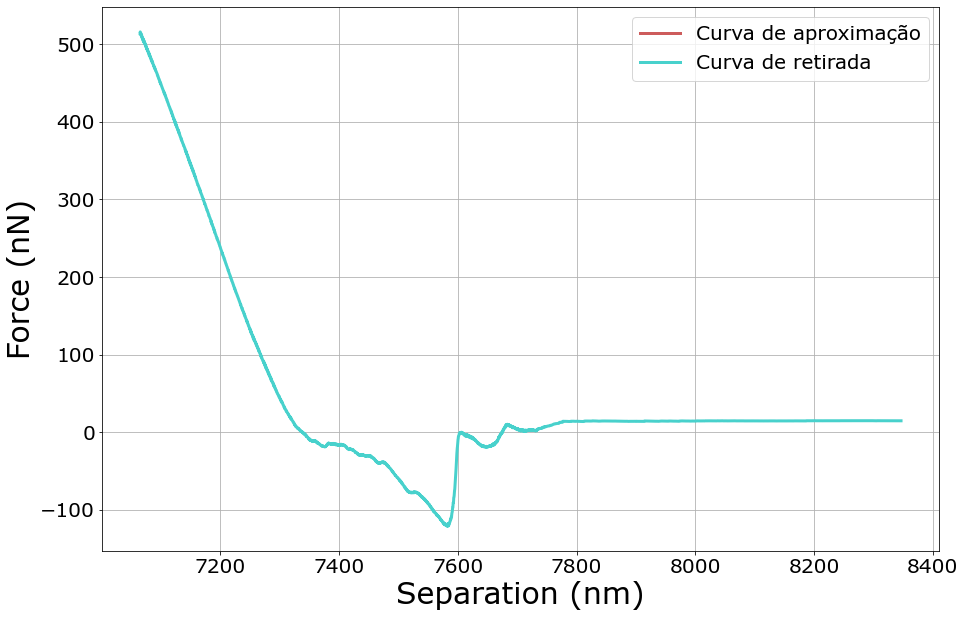

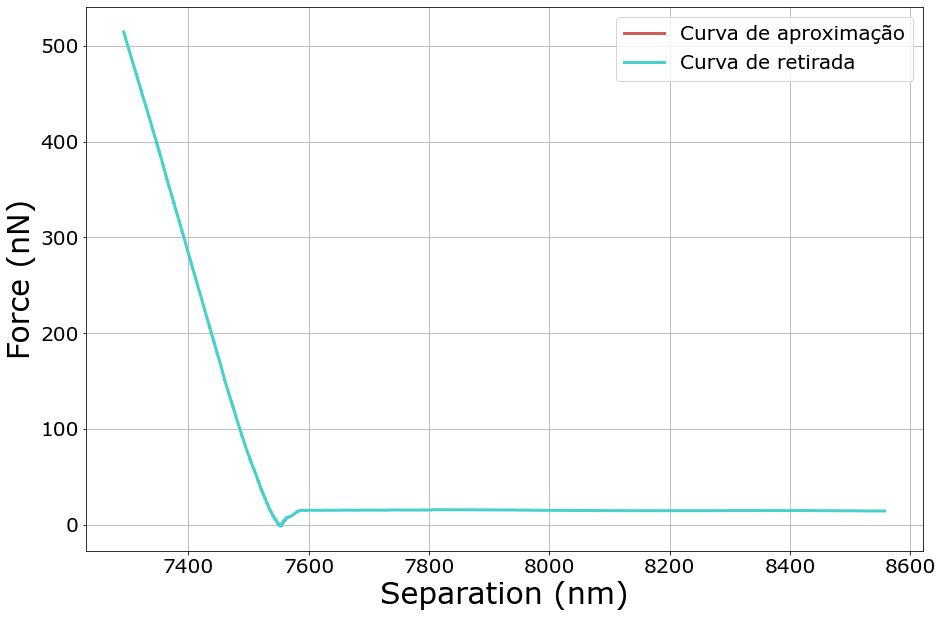

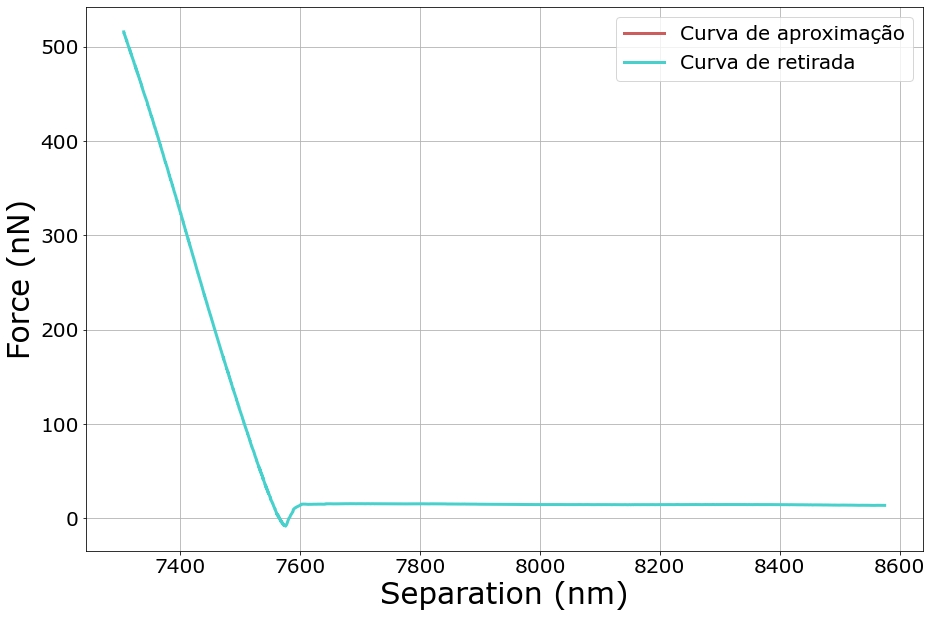

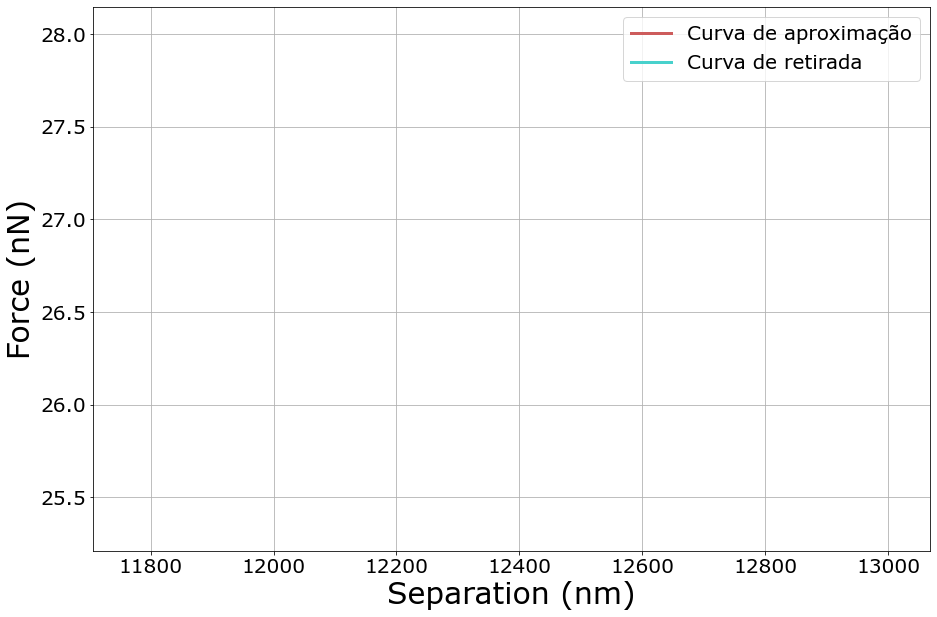

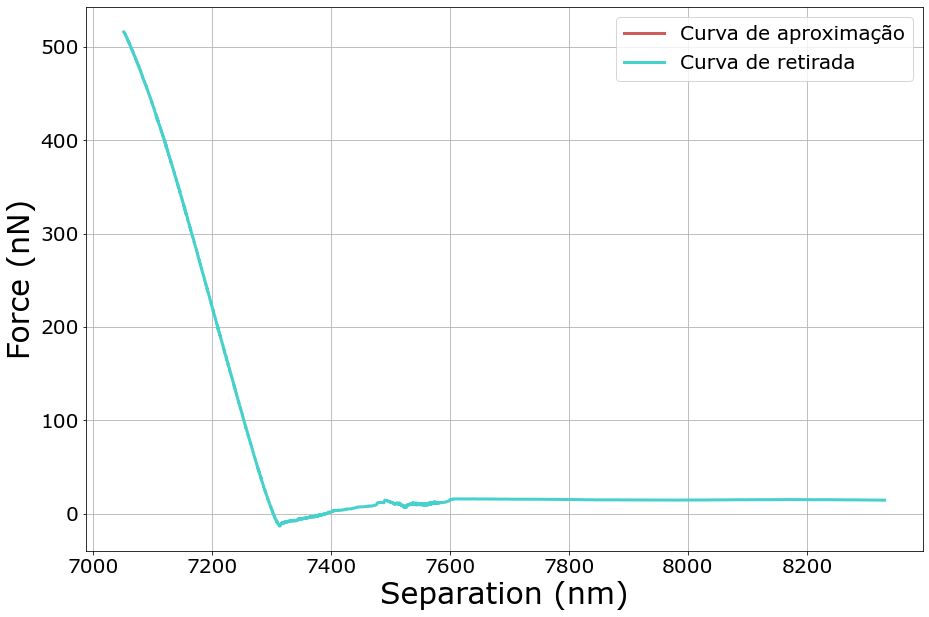

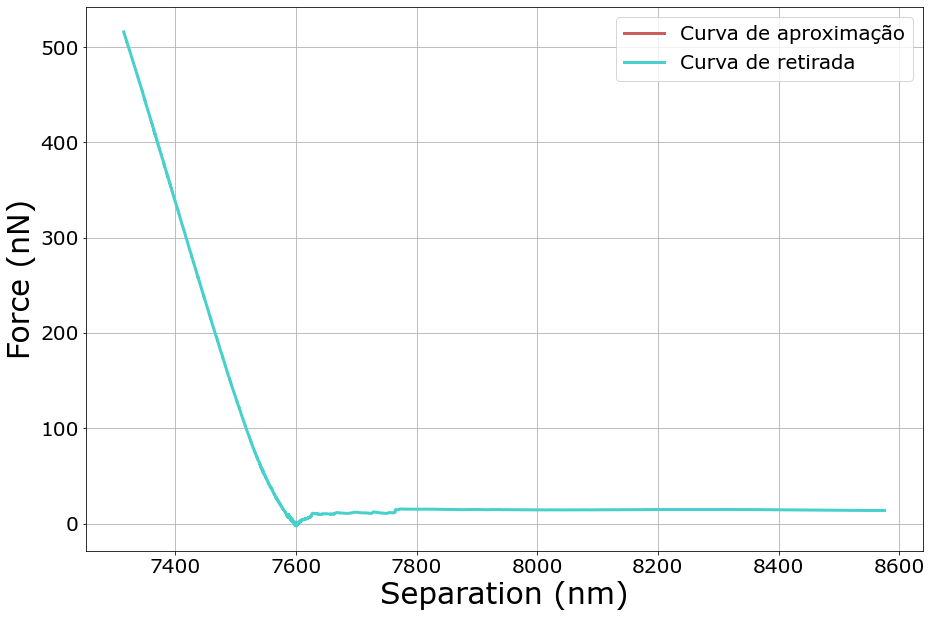

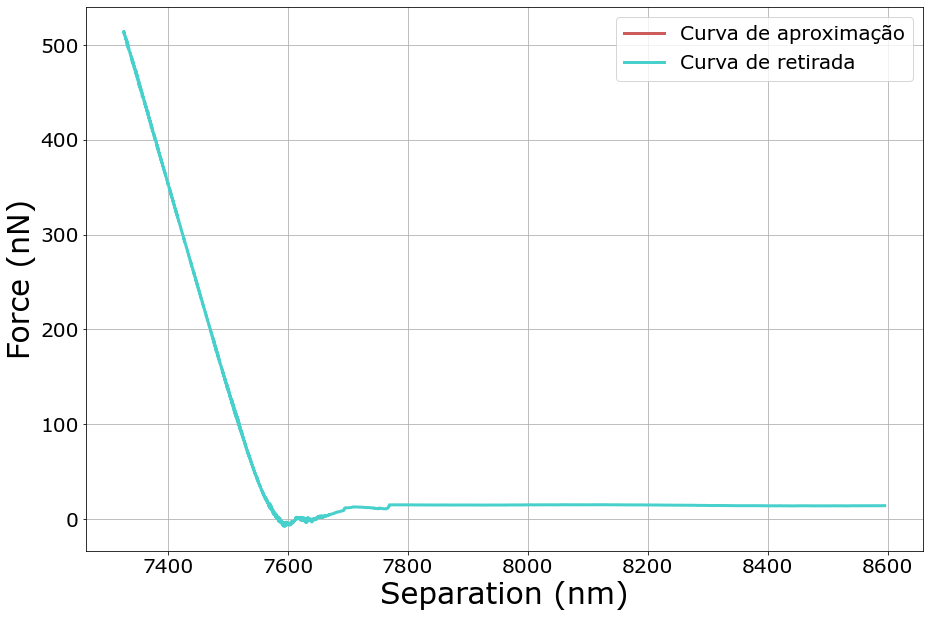

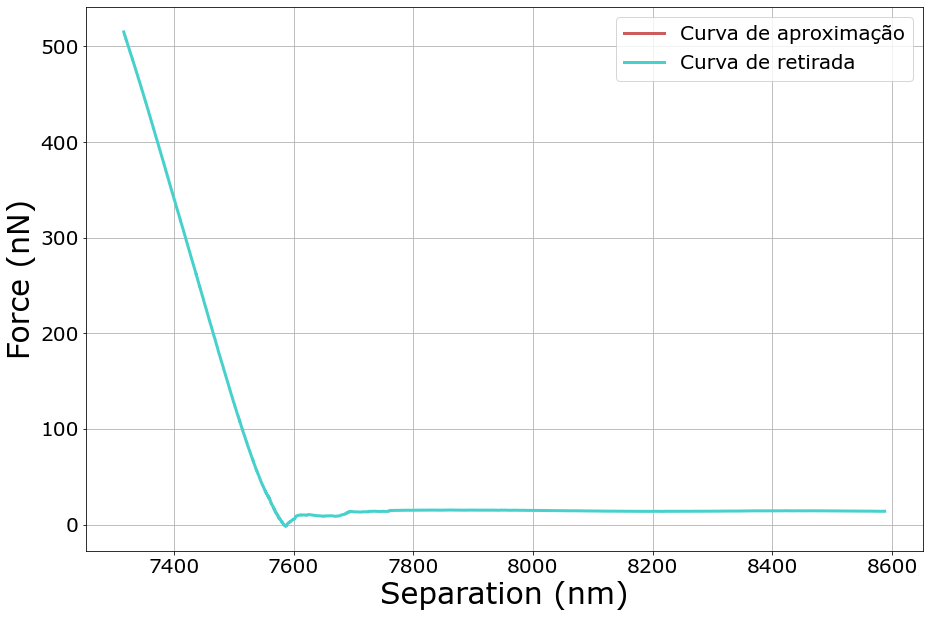

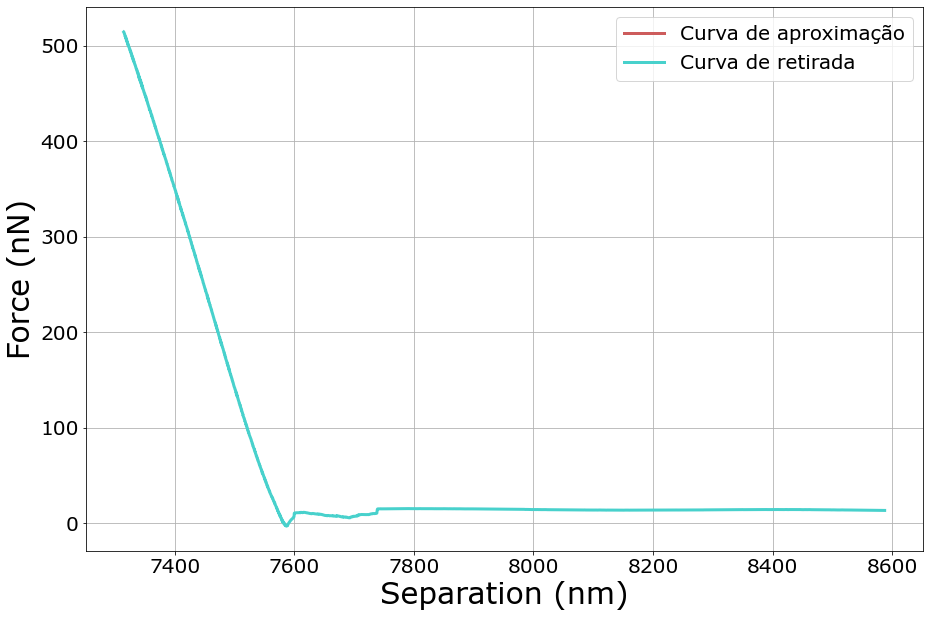

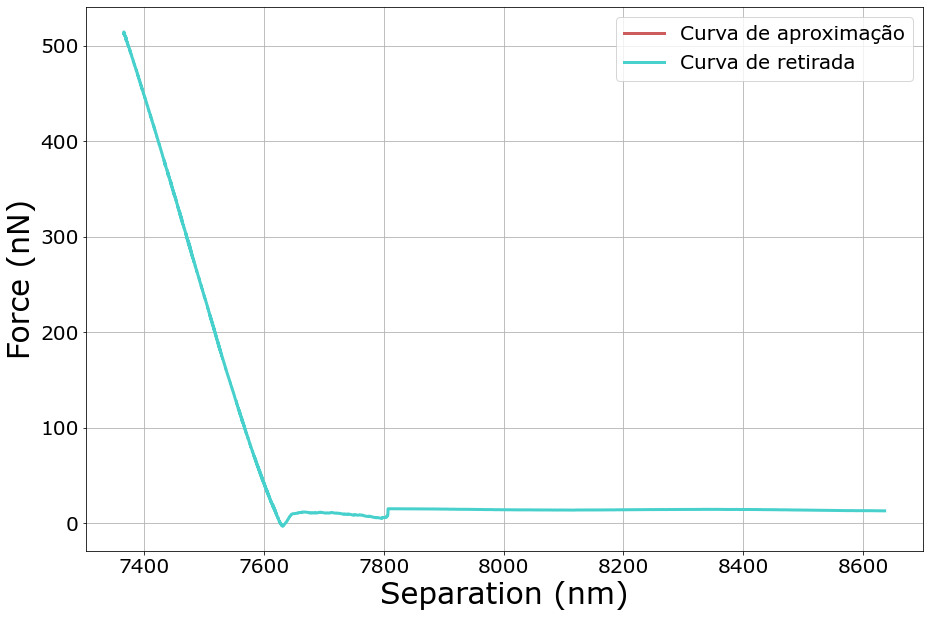

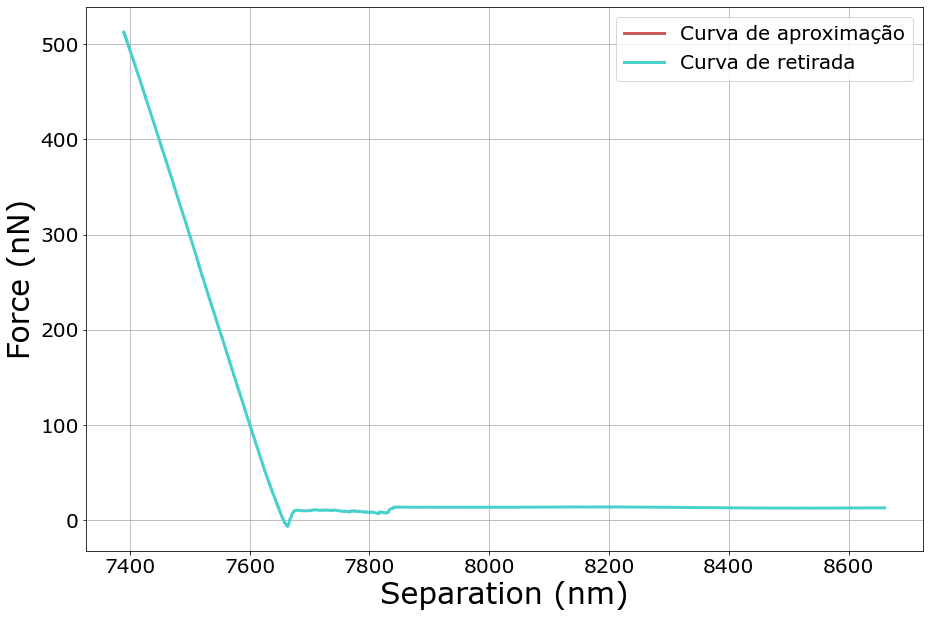

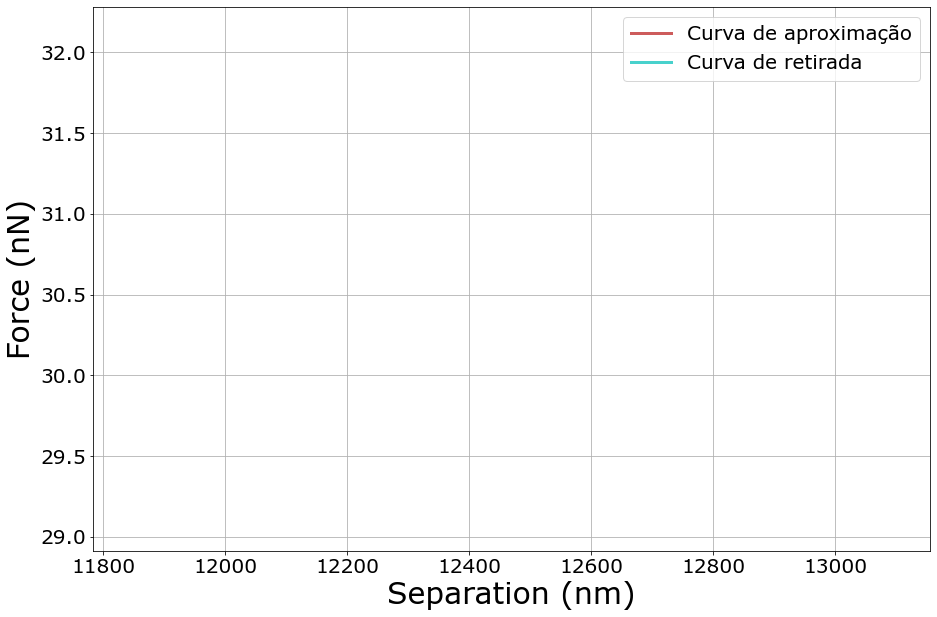

In [4]:
# Função para identificar as posições dos cabeçalhos e rodapés
def find_header_footer(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
        # Encontrar as linhas de cabeçalho e rodapé para 'extend' e 'retract'
        try:
            header_in = next(i for i, line in enumerate(lines) if 'segment: extend' in line) + 1
            footer_in = next(i for i, line in enumerate(lines) if 'segment: retract' in line) - 1
            header_out = footer_in + 2
            footer_out = len(lines) - 1
        except StopIteration:
            # Caso falhe ao localizar as seções, retorna None
            return None, None, None, None, len(lines)
    return header_in, footer_in, header_out, footer_out, len(lines)

# Listar todos os arquivos .txt na pasta
file_list = glob(os.path.join('*.txt'))

for file_path in file_list:
    # Encontrar cabeçalhos, rodapés e número total de linhas para o arquivo atual
    header_in, footer_in, header_out, footer_out, total_lines = find_header_footer(file_path)
    
    # Verificar se as seções foram identificadas corretamente
    if None in (header_in, footer_in, header_out, footer_out):
        print(f"Falha ao localizar seções em {file_path}. Pulando o arquivo.")
        continue
    
    # Ler os dados de aproximação e retirada, ignorando linhas de cabeçalho problemáticas
    data_in = pd.read_csv(file_path, sep='\s+', engine='python', header=header_in, skipfooter=total_lines - footer_in - 1, on_bad_lines='skip')
    data_out = pd.read_csv(file_path, sep='\s+', engine='python', header=header_out, skipfooter=total_lines - footer_out - 1, on_bad_lines='skip')
    
    # Garantir que as colunas sejam numéricas
    data_in = data_in.apply(pd.to_numeric, errors='coerce')
    data_out = data_out.apply(pd.to_numeric, errors='coerce')
    
    # Plotar as curvas de aproximação e retirada
    plt.figure(figsize=(15, 10))
    plt.plot(data_in.iloc[:, 2] * 1e9, data_in.iloc[:, 1] * 1e9, label='Curva de aproximação', linewidth=3, linestyle='-', color='indianred')
    plt.plot(data_out.iloc[:, 2] * 1e9, data_out.iloc[:, 1] * 1e9, label='Curva de retirada', linewidth=3, linestyle='-', color='mediumturquoise')
    plt.xlabel('Separation (nm)', size=30)
    plt.ylabel('Force (nN)', size=30)
    plt.tick_params(labelsize=20)
    plt.legend(loc='upper right', fontsize=20)
    plt.grid()
    plt.show()

In [5]:
forca_dedo = 1e9 #nN
area_dedo = 3e14 #nm² equivale a 3 cm²
diametro_ponta = 80 #nm
area_ponta = np.pi*((diametro_ponta/2)**2) #nm²
area_relativa = area_dedo / area_ponta
forca_distribuida = forca_dedo/area_relativa

In [6]:
pressao_dedo = forca_dedo/area_dedo #nN/nm²
forca_relativa = pressao_dedo * area_ponta #nN
print(round(forca_relativa,4), "nN")

0.0168 nN
